# Import libraries

In [10]:
import os

#vip libraries
import numpy as np
import pandas as pd

#plotting
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle


#sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *


#sktime
#from sktime.clustering.k_means import TimeSeriesKMeans
from sktime.clustering.k_means import TimeSeriesKMeans
from sktime.clustering.k_medoids import TimeSeriesKMedoids
from sktime.utils.plotting import plot_series

#tslearn
from tslearn.metrics import cdist_dtw
#from tslearn.clustering import TimeSeriesKMeans



#import stumpy


In [2]:
import joblib

In [3]:
y = np.load(r'/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/Notebooks/Output/y.npy', allow_pickle=True)
y.shape


(2000,)

In [4]:
X_scal=np.load(r'/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/Notebooks/Output/X_scal.npy')
X_dft=np.load(r'/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/Notebooks/Output/X_dft.npy')
X_sax=np.load(r'/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/Notebooks/Output/X_sax.npy')
X_paa=np.load(r'/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/Notebooks/Output/X_paa.npZ')
X_paa=X_paa['arr_0']

#print(y.shape)
X_scal.shape, X_scal.shape, X_paa.shape, X_sax.shape, X_dft.shape


((2000, 1280), (2000, 1280), (2000, 320), (2000, 500), (2000, 64))

# K-Means

## Raw

### Euclidean

In [15]:
max_k=10
sse_e = []
silhouette_scores_e = []

for k in range(2, max_k+1):
    kmeans = TimeSeriesKMeans(n_clusters=k, max_iter=5, random_state=0, metric='euclidean')
    kmeans.fit(X_scal)
    sse_e.append(kmeans.inertia_)
    print(f'{k}th fit done')
    
    # Calculate silhouette coefficient
    labels_e = kmeans.labels_
    silhouette = silhouette_score(X_scal, labels_e, metric='euclidean')
    silhouette_scores_e.append(silhouette)
    print(f'{k}th append done')

2th fit done
2th append done
3th fit done
3th append done
4th fit done
4th append done
5th fit done
5th append done
6th fit done
6th append done
7th fit done
7th append done
8th fit done
8th append done
9th fit done
9th append done
10th fit done
10th append done


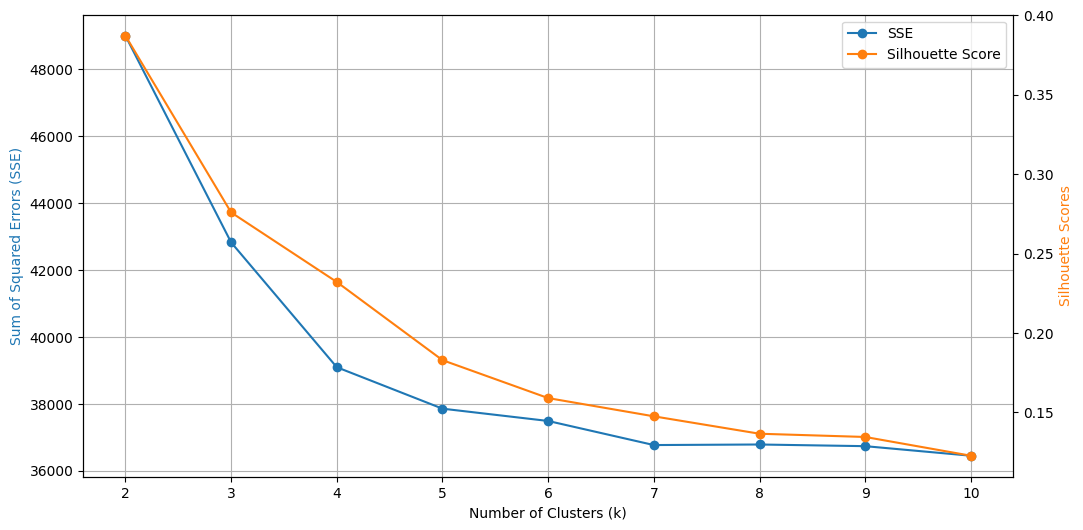

In [16]:
k_values = range(2, max_k + 1)
# Plot SSE and silhouette scores
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot SSE
ax1.plot(k_values, sse_e, marker='o', color='tab:blue', label='SSE')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum of Squared Errors (SSE)', color='tab:blue')

# Create a second y-axis to plot silhouette scores
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores_e, marker='o', color='tab:orange', label='Silhouette Score')
ax2.set_ylabel('Silhouette Scores', color='tab:orange')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')
ax1.grid(True)  # Aggiungi griglia per una migliore lettura
#plt.title('SSE and Silhouette Scores vs. Number of Clusters')
plt.show()


In [17]:
## Best k = 5
km= TimeSeriesKMeans(n_clusters=4, metric="euclidean",
                      max_iter=5, random_state= 0)
km.fit(X_scal)
labels_e=km.labels_
c_counts_e= pd.Series(labels_e).value_counts().sort_index()
c_counts_e


0    489
1    535
2    222
3    754
Name: count, dtype: int64

In [18]:
joblib.dump(km, '/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/Notebooks/Output/Clustering/kmeans_Xscal.joblib')

['/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/Notebooks/Output/Clustering/kmeans_Xscal.joblib']

In [19]:
print('SSE KMeans Euclidean : ', km.inertia_)

labels_e = km.labels_
silhouette_e = silhouette_score(X_scal, labels_e, metric='euclidean')
print('Silhouette KMeans Euclidean : ', silhouette_e)


SSE KMeans Euclidean :  39096.47645800964
Silhouette KMeans Euclidean :  0.2321554037741151


/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/Notebooks/env/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/Notebooks/env/lib/python3.11/site-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


<Figure size 1700x500 with 0 Axes>

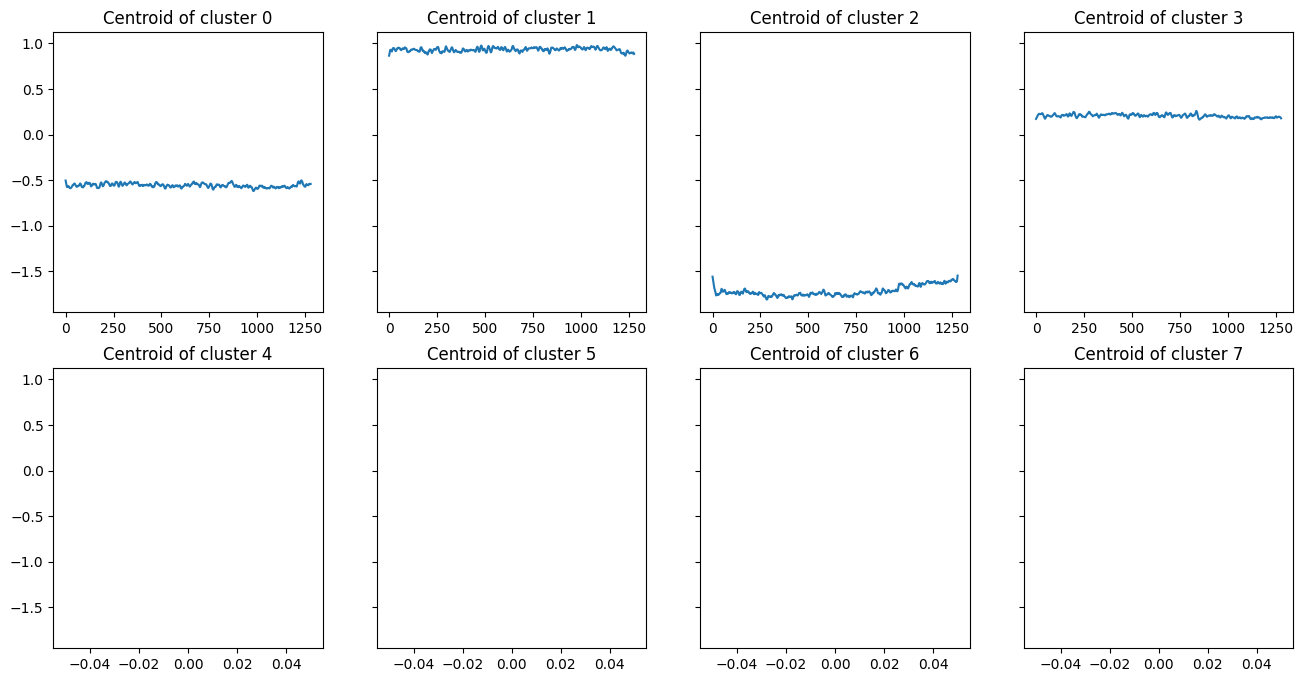

In [20]:
ax1.grid(True)
plt.figure(figsize=(17,5))
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8),sharey=True)

for i in range(0,4):
    axes[0,i].plot(np.mean(X_scal[np.where(km.labels_ == i)[0]], axis=0))
    axes[0,i].set_title(f'Centroid of cluster {i}')
j=0
for i in range(4,8):
    axes[1,j].plot(np.mean(X_scal[np.where(km.labels_ == i)[0]], axis=0))
    axes[1,j].set_title(f'Centroid of cluster {i}')
    j+=1


## SAX

### Euclidean

In [21]:
max_k=10
sse_sax_e = []
silhouette_scores_sax_e = []

for k in range(2, max_k+1):
    kmeans = TimeSeriesKMeans(n_clusters=k, max_iter=5, random_state=0, metric='euclidean')
    kmeans.fit(X_sax)
    sse_sax_e.append(kmeans.inertia_) #kmeans.inertia gives the sse
    print(f'{k}th fit done')
    
    # Calculate silhouette coefficient
    labels_sax_eu = kmeans.labels_
    silhouette = silhouette_score(X_sax, labels_sax_eu, metric='euclidean')
    silhouette_scores_sax_e.append(silhouette)
    print(f'{k}th append done')


2th fit done
2th append done
3th fit done
3th append done
4th fit done
4th append done
5th fit done
5th append done
6th fit done
6th append done
7th fit done
7th append done
8th fit done
8th append done
9th fit done
9th append done
10th fit done
10th append done


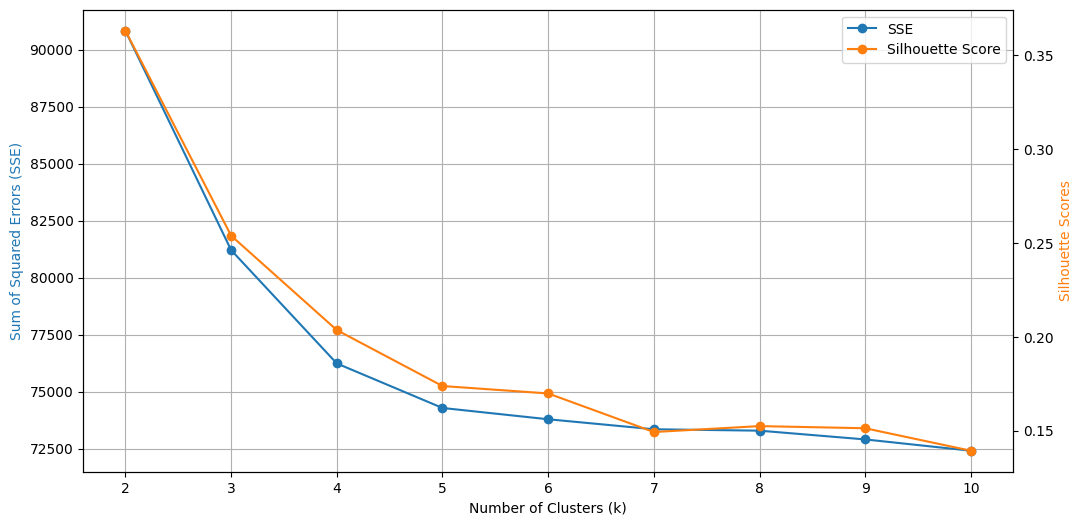

In [22]:
k_values = range(2, max_k + 1)

# Plot SSE and silhouette scores
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot SSE
ax1.plot(k_values, sse_sax_e, marker='o', color='tab:blue', label='SSE')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum of Squared Errors (SSE)', color='tab:blue')

# Create a second y-axis to plot silhouette scores
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores_sax_e, marker='o', color='tab:orange', label='Silhouette Score')
ax2.set_ylabel('Silhouette Scores', color='tab:orange')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

ax1.grid(True)
#plt.title('SSE and Silhouette Scores vs. Number of Clusters')
plt.show()


In [23]:
## Best k
km_sax= TimeSeriesKMeans(n_clusters=4, metric="euclidean", 
                      max_iter=5, random_state=0)
km_sax.fit(X_sax)
labels_sax_e = km_sax.labels_
c_counts_sax_e = pd.Series(labels_sax_e).value_counts().sort_index()
c_counts_sax_e


0    497
1    543
2    295
3    665
Name: count, dtype: int64

In [24]:
joblib.dump(km_sax, '/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/Notebooks/Output/Clustering/kmeans_SAX.joblib')

['/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/Notebooks/Output/Clustering/kmeans_SAX.joblib']

In [25]:
print('SSE KMeans Euclidean: ', km_sax.inertia_)

labels_sax_e = km_sax.labels_
silhouette_e = silhouette_score(X_sax, labels_sax_e, metric='euclidean')
print('Silhouette KMeans Euclidean: ', silhouette_e)


SSE KMeans Euclidean:  76231.43177753194
Silhouette KMeans Euclidean:  0.20356161593379266


/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/Notebooks/env/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/Notebooks/env/lib/python3.11/site-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


<Figure size 1700x500 with 0 Axes>

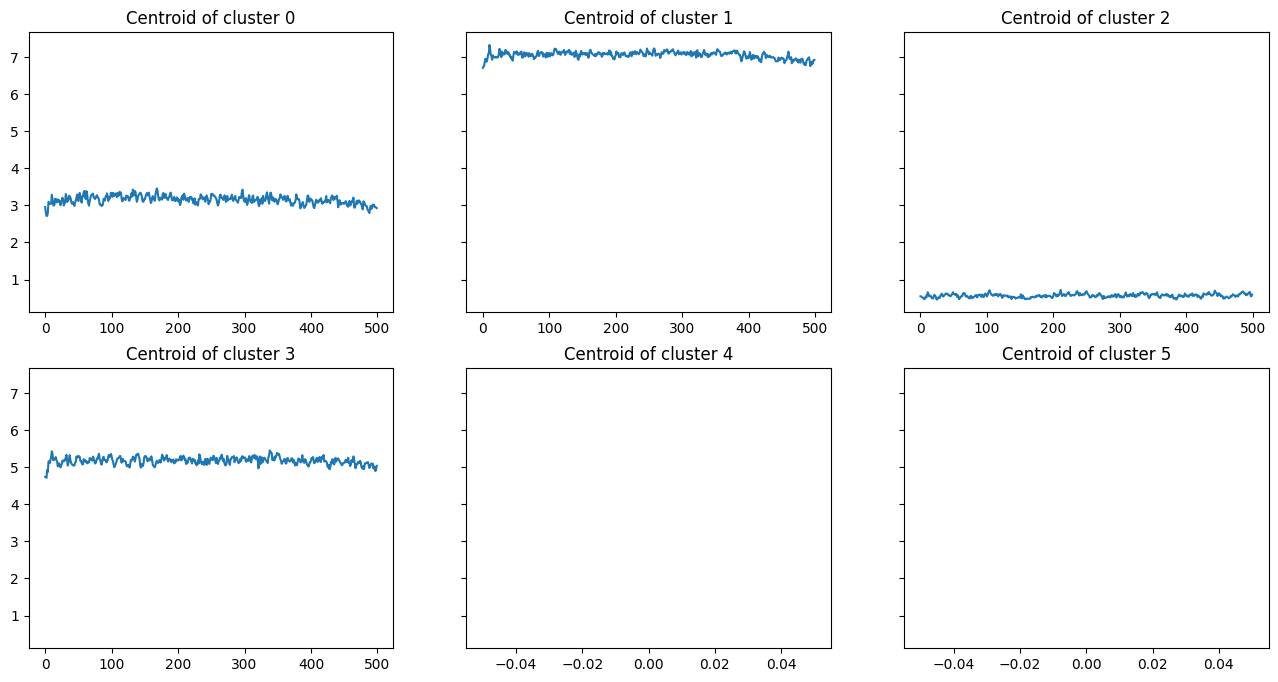

In [26]:
plt.figure(figsize=(17,5))
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8),sharey=True)

for i in range(0,3):
    axes[0,i].plot(np.mean(X_sax[np.where(km_sax.labels_ == i)[0]], axis=0))
    axes[0,i].set_title(f'Centroid of cluster {i}')
j=0
for i in range(3,6):
    axes[1,j].plot(np.mean(X_sax[np.where(km_sax.labels_ == i)[0]], axis=0))
    axes[1,j].set_title(f'Centroid of cluster {i}')
    j+=1


## PAA

### Euclidean

In [27]:
max_k=10
sse_paa_e = []
silhouette_scores_paa_e = []

for k in range(2, max_k+1):
    kmeans = TimeSeriesKMeans(n_clusters=k, max_iter=5, random_state=42, metric='euclidean')
    kmeans.fit(X_paa)
    sse_paa_e.append(kmeans.inertia_)
    print(f'{k}th fit done')
    
    # Calculate silhouette coefficient
    labels_paa_e = kmeans.labels_
    silhouette = silhouette_score(X_paa, labels_paa_e, metric='euclidean')
    silhouette_scores_paa_e.append(silhouette)
    print(f'{k}th append done')


2th fit done
2th append done
3th fit done
3th append done
4th fit done
4th append done
5th fit done
5th append done
6th fit done
6th append done
7th fit done
7th append done
8th fit done
8th append done
9th fit done
9th append done
10th fit done
10th append done


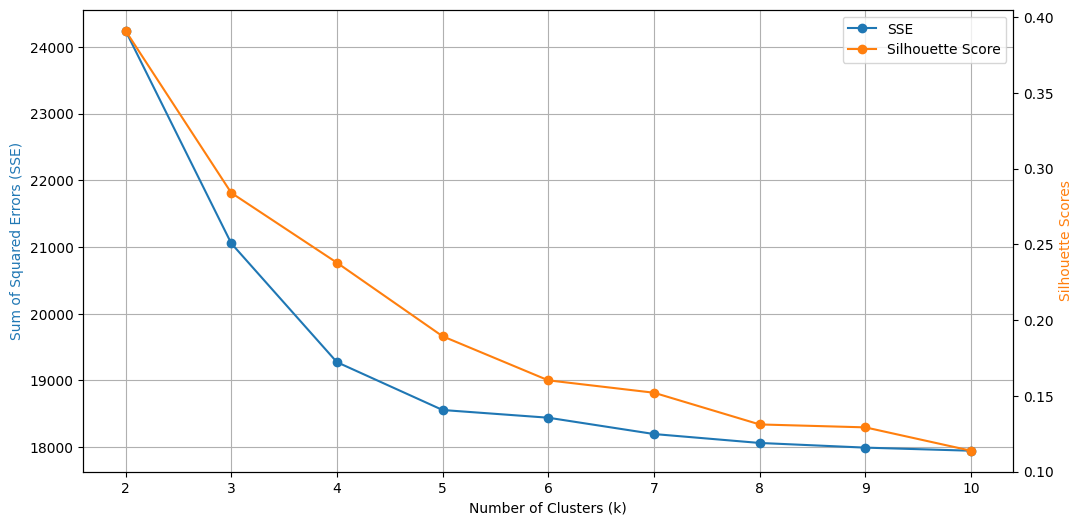

In [28]:
k_values = range(2, max_k + 1)
# Plot SSE and silhouette scores
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot SSE
ax1.plot(k_values, sse_paa_e, marker='o', color='tab:blue', label='SSE')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum of Squared Errors (SSE)', color='tab:blue')

# Create a second y-axis to plot silhouette scores
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores_paa_e, marker='o', color='tab:orange', label='Silhouette Score')
ax2.set_ylabel('Silhouette Scores', color='tab:orange')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

ax1.grid(True)
#plt.title('SSE and Silhouette Scores vs. Number of Clusters')
plt.show()


In [29]:
km_paa= TimeSeriesKMeans(n_clusters=4, metric="euclidean", 
                      max_iter=5, random_state=42)
km_paa.fit(X_paa)
labels_paa_e=km_paa.labels_
c_counts_paa_e = pd.Series(labels_paa_e).value_counts().sort_index()
c_counts_paa_e


0    224
1    782
2    469
3    525
Name: count, dtype: int64

In [30]:
print('SSE KMeans Euclidean PAA: ', km_paa.inertia_)

labels_paa_e = km_paa.labels_
silhouette_paa_e = silhouette_score(X_paa, labels_paa_e, metric='euclidean')
print('Silhouette KMeans Euclidean PAA: ', silhouette_paa_e)


SSE KMeans Euclidean PAA:  19274.442944608403
Silhouette KMeans Euclidean PAA:  0.23790896289260585


/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/Notebooks/env/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/Notebooks/env/lib/python3.11/site-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


<Figure size 1700x500 with 0 Axes>

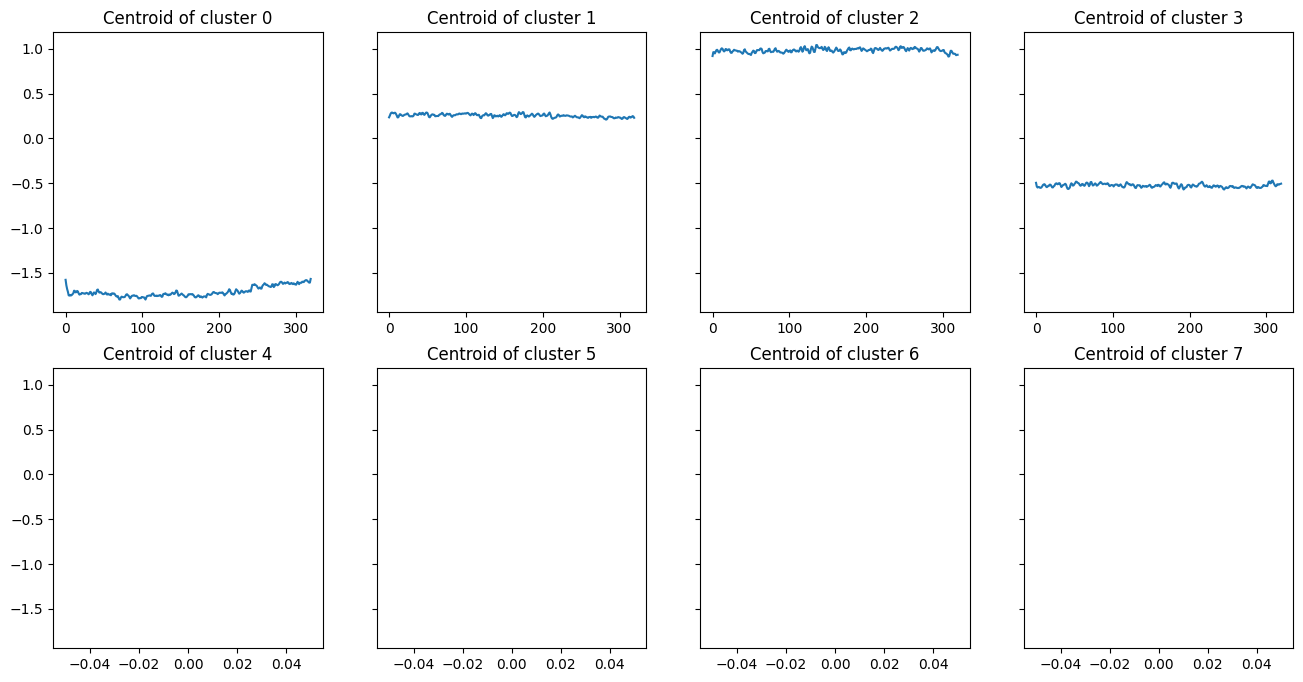

In [31]:
plt.figure(figsize=(17,5))
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8),sharey=True)

for i in range(0,4):
    axes[0,i].plot(np.mean(X_paa[np.where(km_paa.labels_ == i)[0]], axis=0))
    axes[0,i].set_title(f'Centroid of cluster {i}')
j=0
for i in range(4,8):
    axes[1,j].plot(np.mean(X_paa[np.where(km_paa.labels_ == i)[0]], axis=0))
    axes[1,j].set_title(f'Centroid of cluster {i}')
    j+=1


#possiamo vedere che il centroide del cluster 0 è praticamente piatto, perchè è la media di quasi tutte le TS


## DFT

### Euclidean

In [32]:
max_k=10
sse_dft_e = []
silhouette_scores_dft_e = []

for k in range(2, max_k+1):
    kmeans = TimeSeriesKMeans(n_clusters=k, max_iter=5, random_state=42, metric='euclidean')
    kmeans.fit(X_dft)
    sse_dft_e.append(kmeans.inertia_)
    print(f'{k}th fit done')
    
    # Calculate silhouette coefficient
    labels_dft_e = kmeans.labels_
    silhouette = silhouette_score(X_dft, labels_dft_e, metric='euclidean')
    silhouette_scores_dft_e.append(silhouette)
    print(f'{k}th append done')


2th fit done
2th append done
3th fit done
3th append done
4th fit done
4th append done
5th fit done
5th append done
6th fit done
6th append done
7th fit done
7th append done
8th fit done
8th append done
9th fit done
9th append done
10th fit done
10th append done


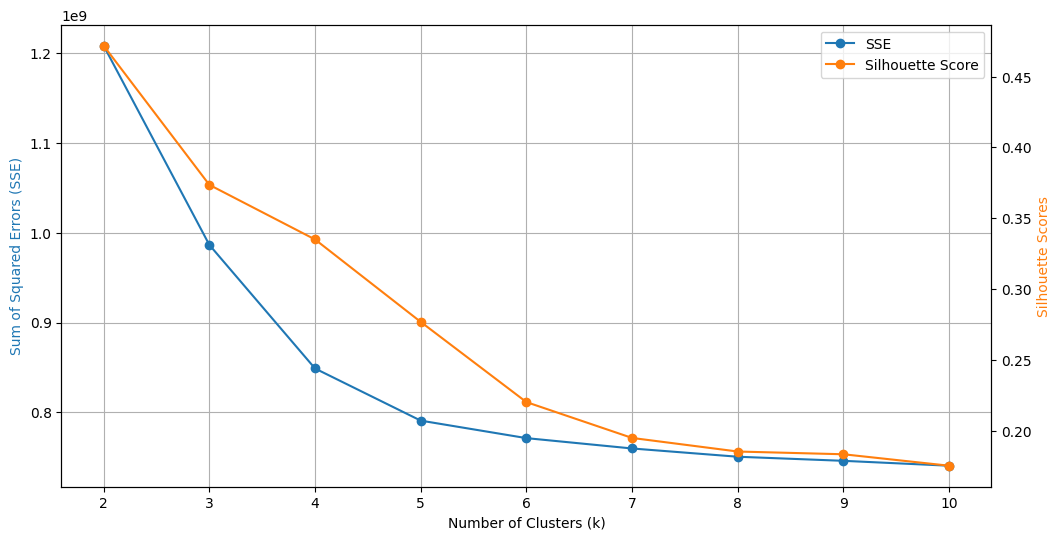

In [33]:
k_values = range(2, max_k + 1)
# Plot SSE and silhouette scores
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot SSE
ax1.plot(k_values, sse_dft_e, marker='o', color='tab:blue', label='SSE')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum of Squared Errors (SSE)', color='tab:blue')

# Create a second y-axis to plot silhouette scores
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores_dft_e, marker='o', color='tab:orange', label='Silhouette Score')
ax2.set_ylabel('Silhouette Scores', color='tab:orange')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

ax1.grid(True)
#plt.title('SSE and Silhouette Scores vs. Number of Clusters')
plt.show()


In [34]:
km_dft= TimeSeriesKMeans(n_clusters=4, metric="euclidean", 
                      max_iter=5, random_state=42)
km_dft.fit(X_dft)
labels_dft_e=km_dft.labels_
c_counts_dft_e = pd.Series(labels_dft_e).value_counts().sort_index()
c_counts_dft_e


0    224
1    779
2    480
3    517
Name: count, dtype: int64

In [35]:
print('SSE KMeans Euclidean PAA: ', km_dft.inertia_)

labels_dft_e = km_dft.labels_
silhouette_dft_e = silhouette_score(X_paa, labels_dft_e, metric='euclidean')
print('Silhouette KMeans Euclidean PAA: ', silhouette_dft_e)


SSE KMeans Euclidean PAA:  848872675.1953721
Silhouette KMeans Euclidean PAA:  0.23753943249702233


/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/Notebooks/env/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/Notebooks/env/lib/python3.11/site-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


<Figure size 1700x500 with 0 Axes>

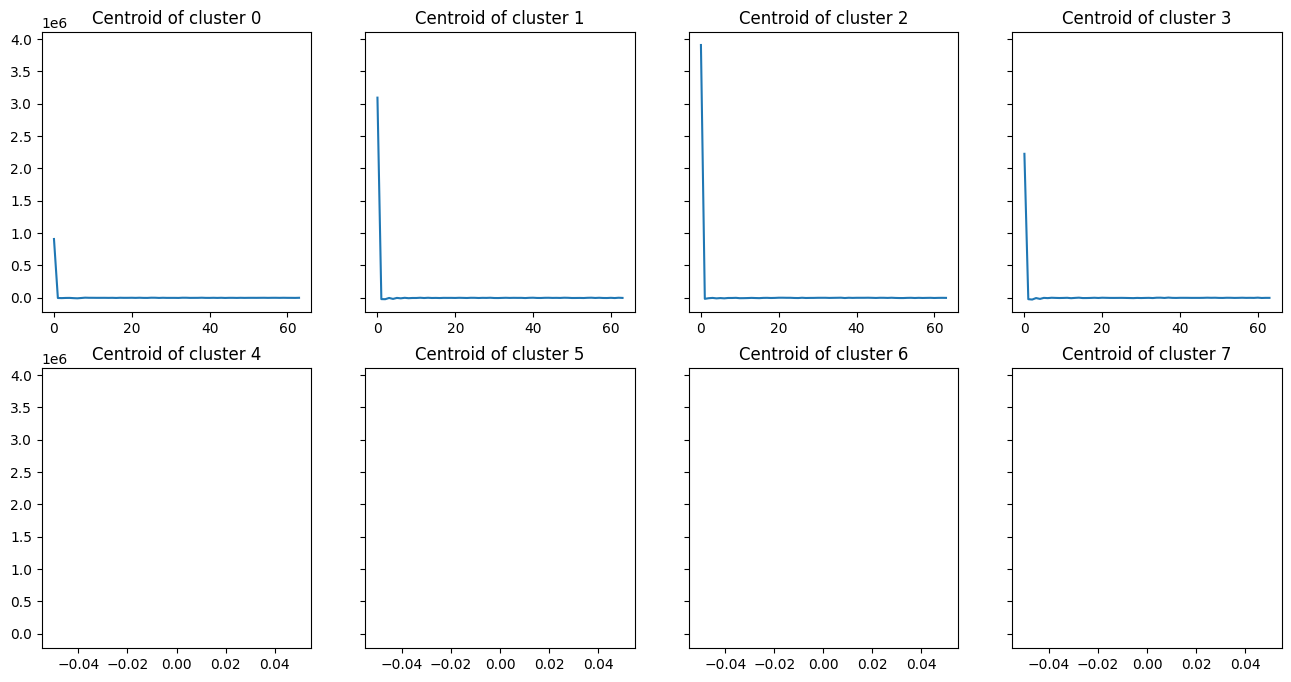

In [36]:
plt.figure(figsize=(17,5))
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8),sharey=True)

for i in range(0,4):
    axes[0,i].plot(np.mean(X_dft[np.where(km_dft.labels_ == i)[0]], axis=0))
    axes[0,i].set_title(f'Centroid of cluster {i}')
j=0
for i in range(4,8):
    axes[1,j].plot(np.mean(X_dft[np.where(km_dft.labels_ == i)[0]], axis=0))
    axes[1,j].set_title(f'Centroid of cluster {i}')
    j+=1


#possiamo vedere che il centroide del cluster 0 è praticamente piatto, perchè è la media di quasi tutte le TS

# K-Medoid

In [7]:
max_k=10
sse_e = []
silhouette_scores_e = []

for k in range(2, max_k+1):
    kmedoid = TimeSeriesKMedoids(n_clusters=k, max_iter=5, random_state=0, metric='euclidean')
    kmedoid.fit(X_scal)
    sse_e.append(kmedoid.inertia_)
    print(f'{k}th fit done')
    
    # Calculate silhouette coefficient
    labels_e = kmedoid.labels_
    silhouette = silhouette_score(X_scal, labels_e, metric='euclidean')
    silhouette_scores_e.append(silhouette)
    print(f'{k}th append done')

2th fit done
2th append done
3th fit done
3th append done
4th fit done
4th append done
5th fit done
5th append done
6th fit done
6th append done
7th fit done
7th append done
8th fit done
8th append done
9th fit done
9th append done
10th fit done
10th append done


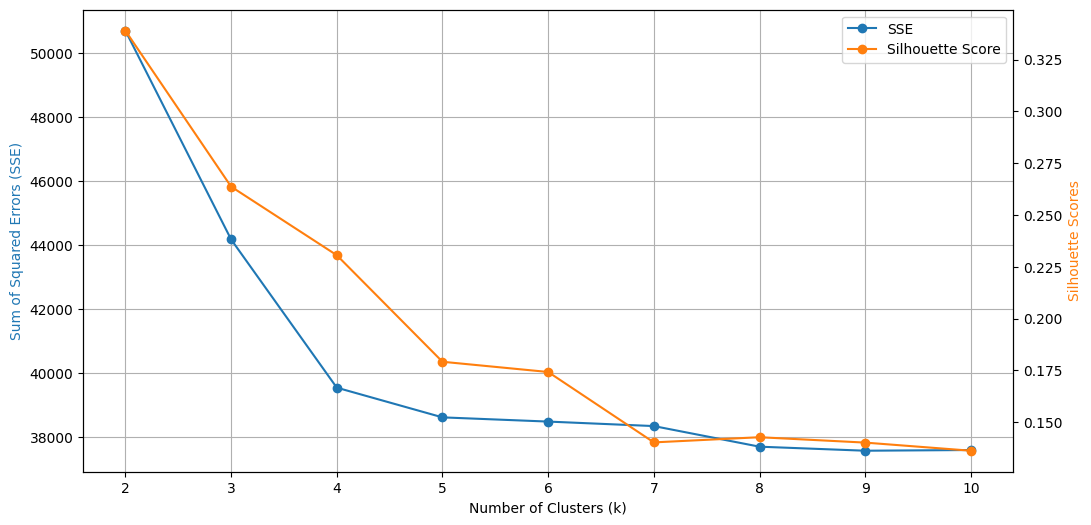

In [8]:
k_values = range(2, max_k + 1)
# Plot SSE and silhouette scores
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot SSE
ax1.plot(k_values, sse_e, marker='o', color='tab:blue', label='SSE')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum of Squared Errors (SSE)', color='tab:blue')

# Create a second y-axis to plot silhouette scores
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores_e, marker='o', color='tab:orange', label='Silhouette Score')
ax2.set_ylabel('Silhouette Scores', color='tab:orange')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

ax1.grid(True)
#plt.title('SSE and Silhouette Scores vs. Number of Clusters')
plt.show()


In [37]:
## Best k = 5
kmedoid= TimeSeriesKMedoids(n_clusters=4, metric="euclidean",
                      max_iter=5, random_state= 0)
kmedoid.fit(X_scal)
labels_e_medoid=kmedoid.labels_
c_counts_e_medoid= pd.Series(labels_e_medoid).value_counts().sort_index()
c_counts_e_medoid

0    224
1    432
2    607
3    737
Name: count, dtype: int64

In [38]:
print('SSE KMeans Euclidean : ', km.inertia_)

labels_e = km.labels_
silhouette_e = silhouette_score(X_scal, labels_e, metric='euclidean')
print('Silhouette KMeans Euclidean : ', silhouette_e)


SSE KMeans Euclidean :  39096.47645800964
Silhouette KMeans Euclidean :  0.2321554037741151


In [49]:
from sklearn.metrics.pairwise import pairwise_distances
distance_matrix_scal = pairwise_distances(X_scal, metric="euclidean")


In [50]:
kmedoid = kme.KMedoids(4, method='fasterpam')
c = kmedoid.fit(distance_matrix_scal)
print("Loss is:", c.inertia_)


Loss is: 39414.492516736216


In [54]:
import time
start = time.time()
fp = kme.fasterpam(distance_matrix_scal, 4)
print("FasterPAM took: %.2f ms" % ((time.time() - start)*1000))
print("Loss with FasterPAM:", fp.loss)
start = time.time()
pam = kme.pam(distance_matrix_scal, 4)
print("PAM took: %.2f ms" % ((time.time() - start)*1000))
print("Loss with PAM:", pam.loss)


FasterPAM took: 103.46 ms
Loss with FasterPAM: 39414.492516736216
PAM took: 186.21 ms
Loss with PAM: 39414.49251673621


In [44]:
X_scal_3D = X_scal[:, :, np.newaxis]  # Convert to 3D


In [6]:
X_paa_3D = X_paa[:, :, np.newaxis]  # Convert to 3D
X_sax_3D = X_sax[:, :, np.newaxis]  # Convert to 3D
X_dft_3D = X_dft[:, :, np.newaxis]  # Convert to 3D


In [ ]:
distance_matrix_dft_dtw = cdist_dtw(X_dft_3D)

In [7]:
from tslearn.metrics import cdist_dtw

# Compute DTW pairwise distances
distance_matrix_paa_dtw = cdist_dtw(X_paa_3D, global_constraint="sakoe_chiba", sakoe_chiba_radius=5)


In [45]:
distance_matrix_sax_dtw = cdist_dtw(X_sax_3D, global_constraint="sakoe_chiba", sakoe_chiba_radius=5)


KeyboardInterrupt: 

In [26]:
distance_matrix_dft_dtw = cdist_dtw(X_dft_3D, global_constraint="sakoe_chiba", sakoe_chiba_radius=5)


In [47]:
distance_matrix_scal_dtw = cdist_dtw(X_scal_3D, global_constraint="sakoe_chiba", sakoe_chiba_radius=5)


In [79]:
from sklearn.metrics.pairwise import pairwise_distances
distance_matrix_scal = pairwise_distances(X_scal, metric="euclidean")
distance_matrix_sax = pairwise_distances(X_sax, metric="euclidean")
distance_matrix_paa = pairwise_distances(X_paa, metric="euclidean")
distance_matrix_dft = pairwise_distances(X_dft, metric="euclidean")


In [8]:
import numpy as np
np.save('distance_matrix_paa_dtw', distance_matrix_paa_dtw)

In [25]:
np.save('distance_matrix_sax_dtw', distance_matrix_sax_dtw)

In [27]:
np.save('distance_matrix_dft_dtw', distance_matrix_dft_dtw)

In [48]:
np.save('distance_matrix_scal_dtw', distance_matrix_scal_dtw)

### Kmedoid with RAW and DTW

In [74]:
import kmedoids as kme
# Assuming distance_matrix_paa_dtw is the precomputed distance matrix
max_k = 10
sse_e = []
silhouette_scores_e = []

for k in range(2, max_k + 1):
    # Initialize KMedoids with precomputed distance matrix
    kmedoid = kme.KMedoids(n_clusters=k, max_iter=5, random_state=0, metric="precomputed", metric_params=None, method='pam', init='random')
    kmedoid.fit(distance_matrix_scal_dtw)
    sse_e.append(kmedoid.inertia_) #kmeans.inertia gives the sse
    print(f'{k}th fit done')
    
    # Append silhouette coefficient
    labels_e = kmedoid.labels_
    silhouette = kme.silhouette(distance_matrix_scal_dtw, labels_e)
    silhouette_scores_e.append(silhouette)
    print(f'{k}th append done')

# Results
print("Silhouette Scores:", silhouette_scores_e)
print("SSE Scores:", sse_e)



2th fit done
2th append done
3th fit done
3th append done
4th fit done
4th append done
5th fit done
5th append done
6th fit done
6th append done
7th fit done
7th append done
8th fit done
8th append done
9th fit done
9th append done
10th fit done
10th append done
Silhouette Scores: [(0.4079428446195653, []), (0.32515390279108936, []), (0.24847676145701644, []), (0.21089153819491605, []), (0.1743389934662692, []), (0.13309140383565718, []), (0.12593843336137514, []), (0.1252457012040383, []), (0.13069880925822186, [])]
SSE Scores: [47588.93462194304, 40843.50397468012, 38126.235593331374, 36502.8021170831, 35893.15058900675, 35555.76859620127, 35498.00847346598, 35456.07620613268, 35314.59206799835]


In [75]:
silhouette_scores_e = [x[0] for x in silhouette_scores_e]

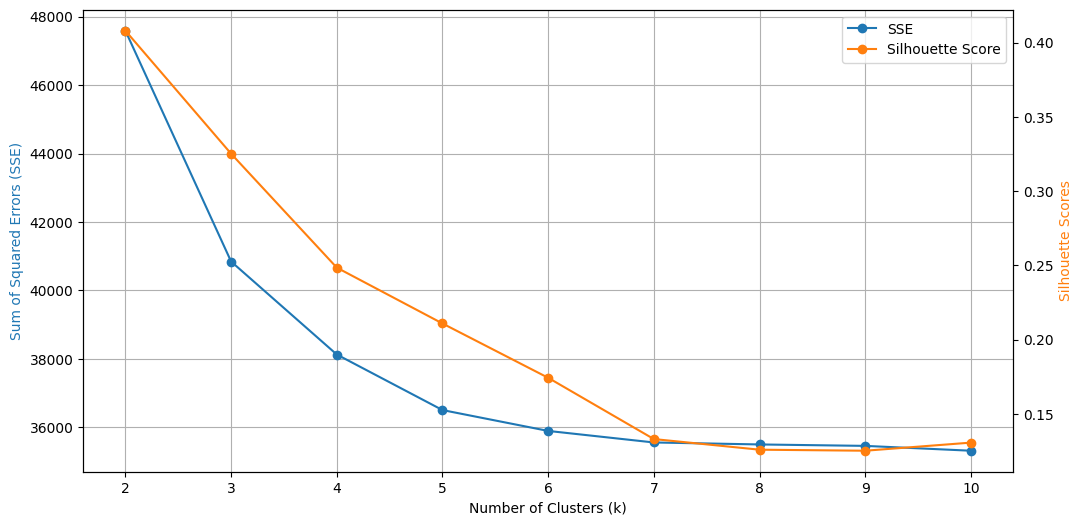

In [76]:
k_values = range(2, max_k + 1)
# Plot SSE and silhouette scores
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot SSE
ax1.plot(k_values, sse_e, marker='o', color='tab:blue', label='SSE')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum of Squared Errors (SSE)', color='tab:blue')

# Create a second y-axis to plot silhouette scores
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores_e, marker='o', color='tab:orange', label='Silhouette Score')
ax2.set_ylabel('Silhouette Scores', color='tab:orange')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

ax1.grid(True)
#plt.title('SSE and Silhouette Scores vs. Number of Clusters')
plt.show()


In [77]:
km= kme.KMedoids(n_clusters=4, max_iter=5, random_state=0, metric="precomputed", metric_params=None, method='pam', init='random')
km.fit(distance_matrix_scal_dtw)
labels_e=km.labels_
c_counts_e= pd.Series(labels_e).value_counts().sort_index()
c_counts_e


0    721
1    322
2    726
3    231
Name: count, dtype: int64

In [78]:
print('SSE KMeans Euclidean : ', km.inertia_)

labels_e = km.labels_
silhouette_e = kme.silhouette(distance_matrix_scal_dtw, labels_e)
print('Silhouette KMeans Euclidean : ', silhouette_e)

SSE KMeans Euclidean :  38126.235593331374
Silhouette KMeans Euclidean :  (0.24847676145701644, [])


### Kmedoid with Raw and Eucl

In [80]:
# Assuming distance_matrix_paa_dtw is the precomputed distance matrix
max_k = 10
sse_e = []
silhouette_scores_e = []

for k in range(2, max_k + 1):
    # Initialize KMedoids with precomputed distance matrix
    kmedoid = kme.KMedoids(n_clusters=k, max_iter=5, random_state=0, metric="precomputed", metric_params=None, method='pam', init='random')
    kmedoid.fit(distance_matrix_scal)
    sse_e.append(kmedoid.inertia_) #kmeans.inertia gives the sse
    print(f'{k}th fit done')
    
    # Append silhouette coefficient
    labels_e = kmedoid.labels_
    silhouette = kme.silhouette(distance_matrix_scal, labels_e)
    silhouette_scores_e.append(silhouette)
    print(f'{k}th append done')

# Results
print("Silhouette Scores:", silhouette_scores_e)
print("SSE Scores:", sse_e)
silhouette_scores_e = [x[0] for x in silhouette_scores_e]


2th fit done
2th append done
3th fit done
3th append done
4th fit done
4th append done
5th fit done
5th append done
6th fit done
6th append done
7th fit done
7th append done
8th fit done
8th append done
9th fit done
9th append done
10th fit done
10th append done
Silhouette Scores: [(0.4003080823148444, []), (0.3008539264300306, []), (0.23696239776414346, []), (0.18946462599424713, []), (0.14539238277096425, []), (0.13691786722952642, []), (0.12539052721417482, []), (0.11335934249745931, []), (0.10750962443657372, [])]
SSE Scores: [49541.769459028255, 42940.43331158206, 39438.58433131675, 38293.51356390811, 38136.46812240988, 37829.4800922718, 37760.56121168677, 37713.340792595925, 37692.69142231319]


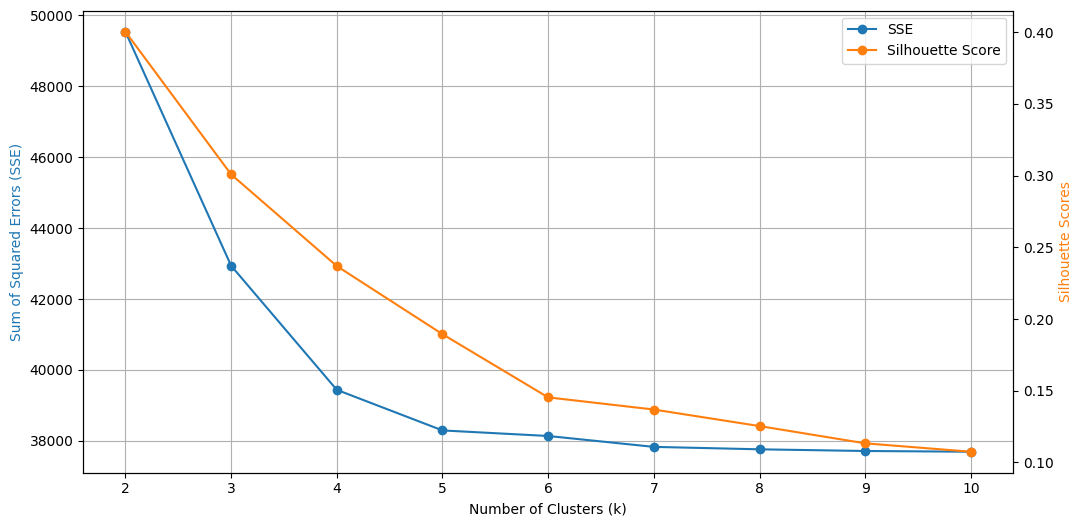

In [81]:
k_values = range(2, max_k + 1)
# Plot SSE and silhouette scores
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot SSE
ax1.plot(k_values, sse_e, marker='o', color='tab:blue', label='SSE')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum of Squared Errors (SSE)', color='tab:blue')

# Create a second y-axis to plot silhouette scores
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores_e, marker='o', color='tab:orange', label='Silhouette Score')
ax2.set_ylabel('Silhouette Scores', color='tab:orange')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

ax1.grid(True)
#plt.title('SSE and Silhouette Scores vs. Number of Clusters')
plt.show()


In [82]:
km= kme.KMedoids(n_clusters=4, max_iter=5, random_state=0, metric="precomputed", metric_params=None, method='pam', init='random')
km.fit(distance_matrix_scal)
labels_e=km.labels_
c_counts_e= pd.Series(labels_e).value_counts().sort_index()
c_counts_e


0    808
1    432
2    547
3    213
Name: count, dtype: int64

In [83]:
print('SSE KMeans Euclidean : ', km.inertia_)

labels_e = km.labels_
silhouette_e = kme.silhouette(distance_matrix_scal, labels_e)
print('Silhouette KMeans Euclidean : ', silhouette_e)

SSE KMeans Euclidean :  39438.58433131675
Silhouette KMeans Euclidean :  (0.23696239776414346, [])


### Kmedoid with PAA and Eucl

In [91]:
import kmedoids as kme
# Assuming distance_matrix_paa_dtw is the precomputed distance matrix
max_k = 10
sse_e = []
silhouette_scores_e = []

for k in range(2, max_k + 1):
    # Initialize KMedoids with precomputed distance matrix
    kmedoid = kme.KMedoids(n_clusters=k, max_iter=5, random_state=0, metric="precomputed", metric_params=None, method='pam', init='random')
    kmedoid.fit(distance_matrix_paa)
    sse_e.append(kmedoid.inertia_) #kmeans.inertia gives the sse
    print(f'{k}th fit done')
    
    # Append silhouette coefficient
    labels_e = kmedoid.labels_
    silhouette = kme.silhouette(distance_matrix_paa, labels_e)
    silhouette_scores_e.append(silhouette)
    print(f'{k}th append done')

# Results
print("Silhouette Scores:", silhouette_scores_e)
print("SSE Scores:", sse_e)
silhouette_scores_e = [x[0] for x in silhouette_scores_e]


2th fit done
2th append done
3th fit done
3th append done
4th fit done
4th append done
5th fit done
5th append done
6th fit done
6th append done
7th fit done
7th append done
8th fit done
8th append done
9th fit done
9th append done
10th fit done
10th append done
Silhouette Scores: [(0.4041819629502757, []), (0.3049276315047204, []), (0.2405683131155455, []), (0.1926779852611816, []), (0.14826997974497974, []), (0.1394315135435392, []), (0.1278902754457513, []), (0.11502868507052161, []), (0.10992726447005922, [])]
SSE Scores: [24513.834249798074, 21192.429498071, 19421.04786495994, 18840.07699042765, 18752.889318962087, 18596.37292315934, 18561.799050705537, 18537.692733724532, 18534.2781164458]


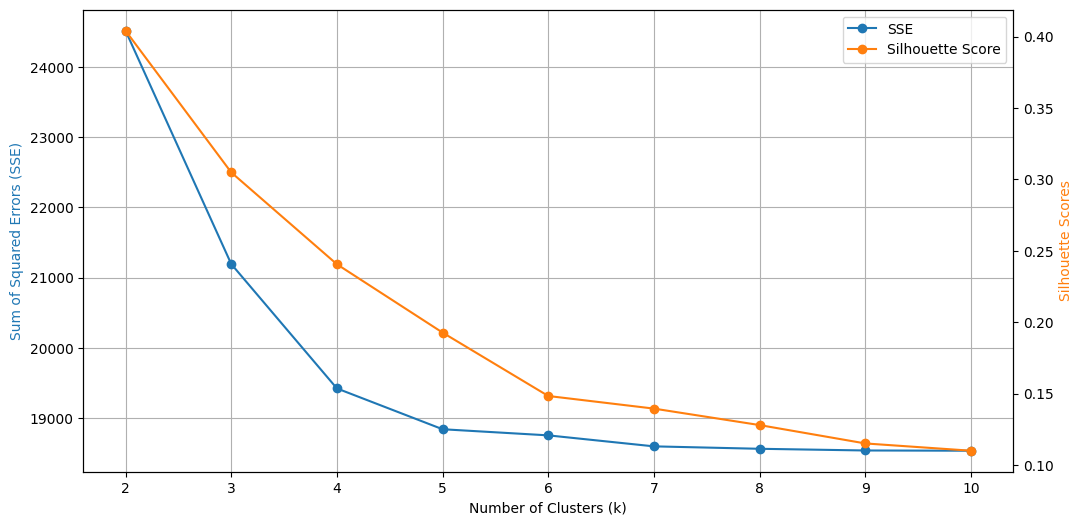

In [92]:
k_values = range(2, max_k + 1)
# Plot SSE and silhouette scores
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot SSE
ax1.plot(k_values, sse_e, marker='o', color='tab:blue', label='SSE')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum of Squared Errors (SSE)', color='tab:blue')

# Create a second y-axis to plot silhouette scores
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores_e, marker='o', color='tab:orange', label='Silhouette Score')
ax2.set_ylabel('Silhouette Scores', color='tab:orange')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

ax1.grid(True)
#plt.title('SSE and Silhouette Scores vs. Number of Clusters')
plt.show()


In [93]:
km= kme.KMedoids(n_clusters=4, max_iter=5, random_state=0, metric="precomputed", metric_params=None, method='pam', init='random')
km.fit(distance_matrix_paa)
labels_e=km.labels_
c_counts_e= pd.Series(labels_e).value_counts().sort_index()
c_counts_e


0    807
1    433
2    547
3    213
Name: count, dtype: int64

In [94]:
print('SSE KMeans Euclidean : ', km.inertia_)

labels_e = km.labels_
silhouette_e = kme.silhouette(distance_matrix_paa, labels_e)
print('Silhouette KMeans Euclidean : ', silhouette_e)

SSE KMeans Euclidean :  19421.04786495994
Silhouette KMeans Euclidean :  (0.2405683131155455, [])


### Kmedoid with PAA and DTW

In [85]:
import kmedoids as kme
# Assuming distance_matrix_paa_dtw is the precomputed distance matrix
max_k = 10
sse_e = []
silhouette_scores_e = []

for k in range(2, max_k + 1):
    # Initialize KMedoids with precomputed distance matrix
    kmedoid = kme.KMedoids(n_clusters=k, max_iter=5, random_state=0, metric="precomputed", metric_params=None, method='pam', init='random')
    kmedoid.fit(distance_matrix_paa_dtw)
    sse_e.append(kmedoid.inertia_) #kmeans.inertia gives the sse
    print(f'{k}th fit done')
    
    # Append silhouette coefficient
    labels_e = kmedoid.labels_
    silhouette = kme.silhouette(distance_matrix_paa_dtw, labels_e)
    silhouette_scores_e.append(silhouette)
    print(f'{k}th append done')

# Results
print("Silhouette Scores:", silhouette_scores_e)
print("SSE Scores:", sse_e)
silhouette_scores_e = [x[0] for x in silhouette_scores_e]


2th fit done
2th append done
3th fit done
3th append done
4th fit done
4th append done
5th fit done
5th append done
6th fit done
6th append done
7th fit done
7th append done
8th fit done
8th append done
9th fit done
9th append done
10th fit done
10th append done
Silhouette Scores: [(0.45297491829806075, []), (0.3626039809096576, []), (0.28283382848779576, []), (0.24109886009860787, []), (0.1859282034213348, []), (0.1788210606938085, []), (0.15633638524637383, []), (0.15247291875727148, []), (0.12174089297506466, [])]
SSE Scores: [20775.588766126446, 17448.16882393699, 16170.82372834086, 15299.169501850596, 15063.490915007897, 14941.753655448252, 14862.094486747437, 14826.951783457238, 14735.349173562694]


In [62]:
silhouette_scores_e = [x[0] for x in silhouette_scores_e]


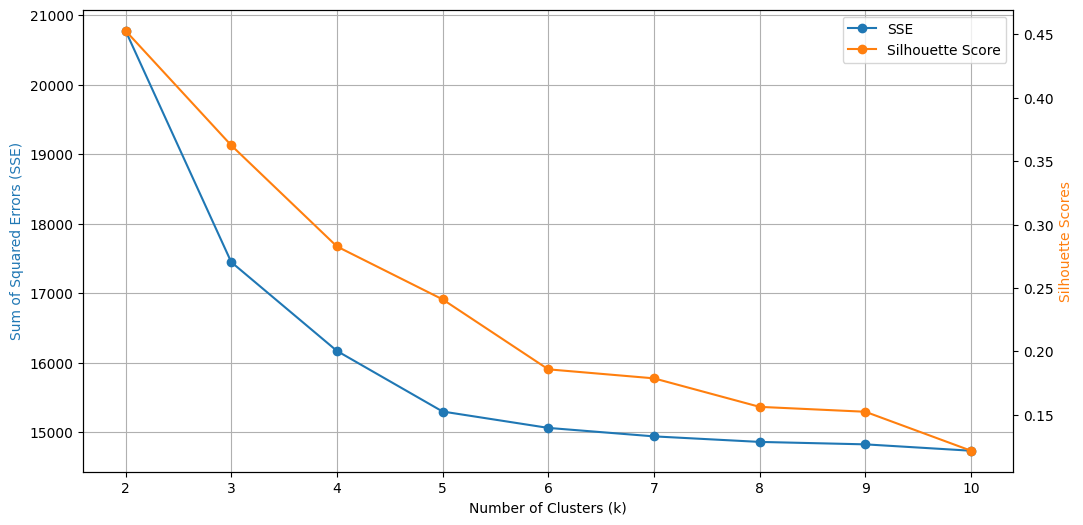

In [63]:
k_values = range(2, max_k + 1)
# Plot SSE and silhouette scores
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot SSE
ax1.plot(k_values, sse_e, marker='o', color='tab:blue', label='SSE')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum of Squared Errors (SSE)', color='tab:blue')

# Create a second y-axis to plot silhouette scores
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores_e, marker='o', color='tab:orange', label='Silhouette Score')
ax2.set_ylabel('Silhouette Scores', color='tab:orange')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

ax1.grid(True)
#plt.title('SSE and Silhouette Scores vs. Number of Clusters')
plt.show()


In [104]:
## Best k = 5
km= kme.KMedoids(n_clusters=4, max_iter=5, random_state=0, metric="precomputed", metric_params=None, method='pam', init='random')
km.fit(distance_matrix_paa_dtw)
labels_e_paa=km.labels_
c_counts_e= pd.Series(labels_e_paa).value_counts().sort_index()
c_counts_e


0    748
1    289
2    728
3    235
Name: count, dtype: int64

In [65]:
print('SSE KMeans Euclidean : ', km.inertia_)

labels_e = km.labels_
silhouette_e = kme.silhouette(distance_matrix_paa_dtw, labels_e)
print('Silhouette KMeans Euclidean : ', silhouette_e)

SSE KMeans Euclidean :  16170.82372834086
Silhouette KMeans Euclidean :  (0.28283382848779576, [])


### Kmedoid with SAX and DTW

In [66]:
# Assuming distance_matrix_paa_dtw is the precomputed distance matrix
max_k = 10
sse_sax_e = []
silhouette_scores_sax_e = []

for k in range(2, max_k + 1):
    # Initialize KMedoids with precomputed distance matrix
    kmedoid = kme.KMedoids(n_clusters=k, max_iter=5, random_state=0, metric="precomputed", metric_params=None, method='pam', init='random')
    kmedoid.fit(distance_matrix_sax_dtw)
    sse_sax_e.append(kmedoid.inertia_) #kmeans.inertia gives the sse
    print(f'{k}th fit done')
    
    # Append silhouette coefficient
    labels_e = kmedoid.labels_
    silhouette = kme.silhouette(distance_matrix_paa_dtw, labels_e)
    silhouette_scores_sax_e.append(silhouette)
    print(f'{k}th append done')

# Results
print("Silhouette Scores:", silhouette_scores_sax_e)
print("SSE Scores:", sse_sax_e)
silhouette_scores_sax_e = [x[0] for x in silhouette_scores_sax_e]



2th fit done
2th append done
3th fit done
3th append done
4th fit done
4th append done
5th fit done
5th append done
6th fit done
6th append done
7th fit done
7th append done
8th fit done
8th append done
9th fit done
9th append done
10th fit done
10th append done
Silhouette Scores: [(0.42964490926514703, []), (0.34684564606854557, []), (0.25860787039279376, []), (0.2041036770470347, []), (0.1813051400880232, []), (0.10928062171702504, []), (0.10803001731908496, []), (0.08825533958222995, []), (0.07465696726710092, [])]
SSE Scores: [74247.02114162805, 62455.76890838155, 59306.965961675276, 56696.07537109431, 56158.60199655325, 56024.55107891833, 55914.60451920515, 55756.05712988463, 55378.81451531816]


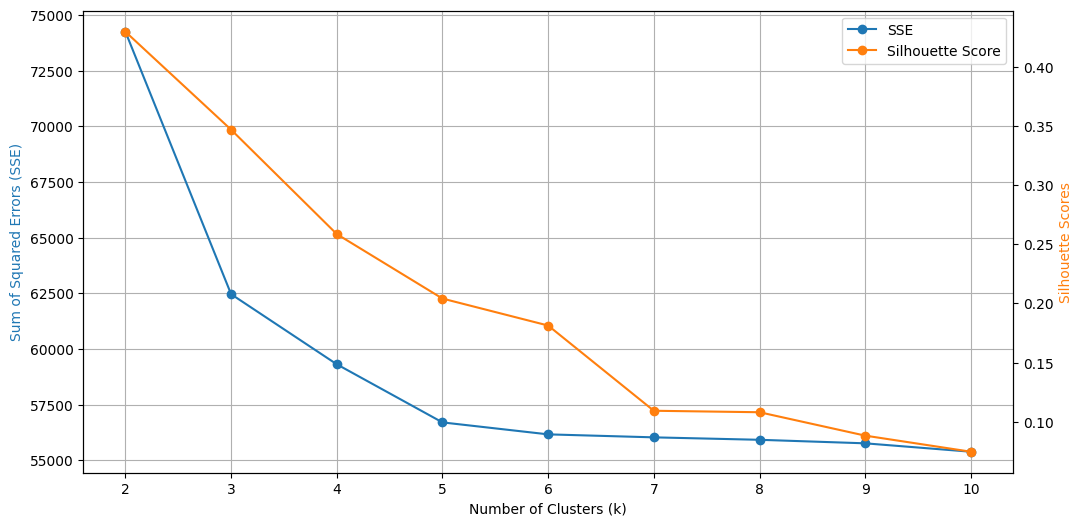

In [67]:
k_values = range(2, max_k + 1)
# Plot SSE and silhouette scores
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot SSE
ax1.plot(k_values, sse_sax_e, marker='o', color='tab:blue', label='SSE')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum of Squared Errors (SSE)', color='tab:blue')

# Create a second y-axis to plot silhouette scores
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores_e, marker='o', color='tab:orange', label='Silhouette Score')
ax2.set_ylabel('Silhouette Scores', color='tab:orange')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

ax1.grid(True)
#plt.title('SSE and Silhouette Scores vs. Number of Clusters')
plt.show()


In [ ]:
import kmedoids as kme
# Assuming distance_matrix_paa_dtw is the precomputed distance matrix
max_k = 10
sse_e = []
silhouette_scores_e = []

for k in range(2, max_k + 1):
    # Initialize KMedoids with precomputed distance matrix
    kmedoid = kme.KMedoids(n_clusters=k, max_iter=5, random_state=0, metric="precomputed", metric_params=None, method='pam', init='random')
    kmedoid.fit(distance_matrix_paa_dtw)
    sse_e.append(kmedoid.inertia_) #kmeans.inertia gives the sse
    print(f'{k}th fit done')
    
    # Append silhouette coefficient
    labels_e = kmedoid.labels_
    silhouette = kme.silhouette(distance_matrix_paa_dtw, labels_e)
    silhouette_scores_e.append(silhouette)
    print(f'{k}th append done')

# Results
print("Silhouette Scores:", silhouette_scores_e)
print("SSE Scores:", sse_e)
silhouette_scores_e = [x[0] for x in silhouette_scores_e]


2th fit done
2th append done
3th fit done
3th append done
4th fit done
4th append done
5th fit done
5th append done
6th fit done
6th append done
7th fit done
7th append done
8th fit done
8th append done
9th fit done
9th append done
10th fit done
10th append done
Silhouette Scores: [(0.45297491829806075, []), (0.3626039809096576, []), (0.28283382848779576, []), (0.24109886009860787, []), (0.1859282034213348, []), (0.1788210606938085, []), (0.15633638524637383, []), (0.15247291875727148, []), (0.12174089297506466, [])]
SSE Scores: [20775.588766126446, 17448.16882393699, 16170.82372834086, 15299.169501850596, 15063.490915007897, 14941.753655448252, 14862.094486747437, 14826.951783457238, 14735.349173562694]


In [68]:
## Best k = 5
km= kme.KMedoids(n_clusters=4, max_iter=5, random_state=0, metric="precomputed", metric_params=None, method='pam', init='random')
km.fit(distance_matrix_sax_dtw)
labels_e=km.labels_
c_counts_e= pd.Series(labels_e).value_counts().sort_index()
c_counts_e


0    716
1    395
2    666
3    223
Name: count, dtype: int64

In [69]:
print('SSE KMeans Euclidean : ', km.inertia_)

labels_e = km.labels_
silhouette_e = kme.silhouette(distance_matrix_sax_dtw, labels_e)
print('Silhouette KMeans Euclidean : ', silhouette_e)

SSE KMeans Euclidean :  59306.965961675276
Silhouette KMeans Euclidean :  (0.2746279478365796, [])


### Kmedoid with SAX and Eucl

In [95]:
# Assuming distance_matrix_paa_dtw is the precomputed distance matrix
max_k = 10
sse_sax_e = []
silhouette_scores_sax_e = []

for k in range(2, max_k + 1):
    # Initialize KMedoids with precomputed distance matrix
    kmedoid = kme.KMedoids(n_clusters=k, max_iter=5, random_state=0, metric="precomputed", metric_params=None, method='pam', init='random')
    kmedoid.fit(distance_matrix_sax)
    sse_sax_e.append(kmedoid.inertia_) #kmeans.inertia gives the sse
    print(f'{k}th fit done')
    
    # Append silhouette coefficient
    labels_e = kmedoid.labels_
    silhouette = kme.silhouette(distance_matrix_sax, labels_e)
    silhouette_scores_sax_e.append(silhouette)
    print(f'{k}th append done')

# Results
print("Silhouette Scores:", silhouette_scores_sax_e)
print("SSE Scores:", sse_sax_e)
silhouette_scores_sax_e = [x[0] for x in silhouette_scores_sax_e]



2th fit done
2th append done
3th fit done
3th append done
4th fit done
4th append done
5th fit done
5th append done
6th fit done
6th append done
7th fit done
7th append done
8th fit done
8th append done
9th fit done
9th append done
10th fit done
10th append done
Silhouette Scores: [(0.37099640879234563, []), (0.2721290534851639, []), (0.1943486082682715, []), (0.13933649155417918, []), (0.11799857095211036, []), (0.09970147308746394, []), (0.09982177713229075, []), (0.09984847638954485, []), (0.09738136255253808, [])]
SSE Scores: [93168.1322860572, 83100.56986791006, 77445.0604731889, 76105.25636855923, 75628.47216685137, 75206.49170601647, 75139.58131818319, 75080.14227377634, 75024.84521586871]


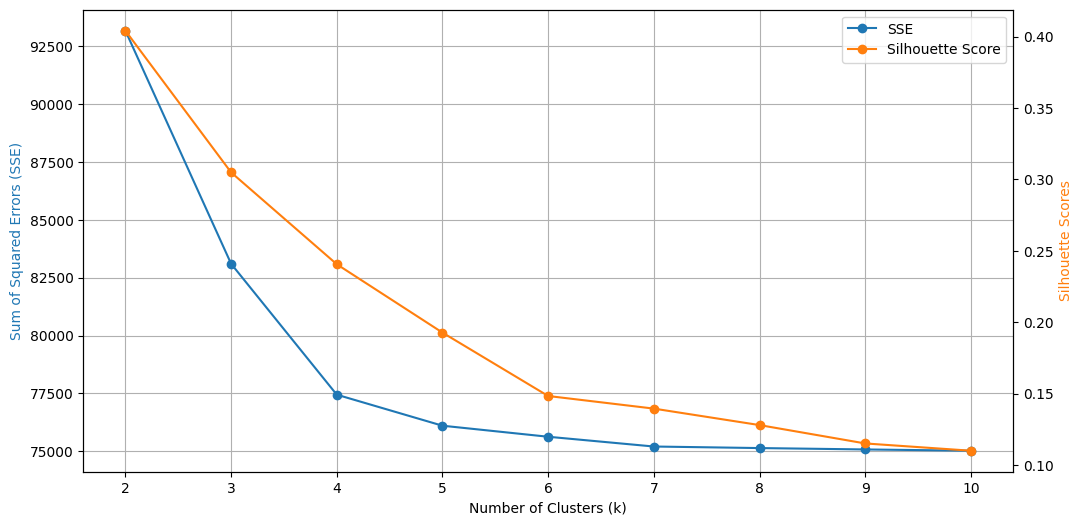

In [96]:
k_values = range(2, max_k + 1)
# Plot SSE and silhouette scores
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot SSE
ax1.plot(k_values, sse_sax_e, marker='o', color='tab:blue', label='SSE')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum of Squared Errors (SSE)', color='tab:blue')

# Create a second y-axis to plot silhouette scores
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores_e, marker='o', color='tab:orange', label='Silhouette Score')
ax2.set_ylabel('Silhouette Scores', color='tab:orange')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

ax1.grid(True)
#plt.title('SSE and Silhouette Scores vs. Number of Clusters')
plt.show()


In [97]:
km= kme.KMedoids(n_clusters=4, max_iter=5, random_state=0, metric="precomputed", metric_params=None, method='pam', init='random')
km.fit(distance_matrix_sax)
labels_e=km.labels_
c_counts_e= pd.Series(labels_e).value_counts().sort_index()
c_counts_e


0    713
1    438
2    603
3    246
Name: count, dtype: int64

In [98]:
print('SSE KMeans Euclidean : ', km.inertia_)

labels_e = km.labels_
silhouette_e = kme.silhouette(distance_matrix_sax, labels_e)
print('Silhouette KMeans Euclidean : ', silhouette_e)

SSE KMeans Euclidean :  77445.0604731889
Silhouette KMeans Euclidean :  (0.1943486082682715, [])


### Kmedoid with DFT and DWT

In [70]:
# Assuming distance_matrix_paa_dtw is the precomputed distance matrix
max_k = 10
sse_dft_e = []
silhouette_scores_dft_e = []

for k in range(2, max_k + 1):
    # Initialize KMedoids with precomputed distance matrix
    kmedoid = kme.KMedoids(n_clusters=k, max_iter=5, random_state=0, metric="precomputed", metric_params=None, method='pam', init='random')
    kmedoid.fit(distance_matrix_dft_dtw)
    sse_dft_e.append(kmedoid.inertia_) #kmeans.inertia gives the sse
    print(f'{k}th fit done')
    
    # Append silhouette coefficient
    labels_e = kmedoid.labels_
    silhouette = kme.silhouette(distance_matrix_dft_dtw, labels_e)
    silhouette_scores_dft_e.append(silhouette)
    print(f'{k}th append done')

# Results
print("Silhouette Scores:", silhouette_scores_dft_e)
print("SSE Scores:", sse_dft_e)
silhouette_scores_dft_e = [x[0] for x in silhouette_scores_dft_e]


2th fit done
2th append done
3th fit done
3th append done
4th fit done
4th append done
5th fit done
5th append done
6th fit done
6th append done
7th fit done
7th append done
8th fit done
8th append done
9th fit done
9th append done
10th fit done
10th append done
Silhouette Scores: [(0.49993970847878916, []), (0.45231790975103775, []), (0.40617126477547116, []), (0.34848994349718687, []), (0.31738433934836413, []), (0.28021795351219947, []), (0.23794885736965762, []), (0.22004435310103718, []), (0.19077182414477242, [])]
SSE Scores: [1113785201.013462, 876769714.158419, 746404015.8440093, 682832111.1695822, 641998544.0454137, 626818926.0159516, 607577088.235528, 600122327.8151988, 589569932.0965837]


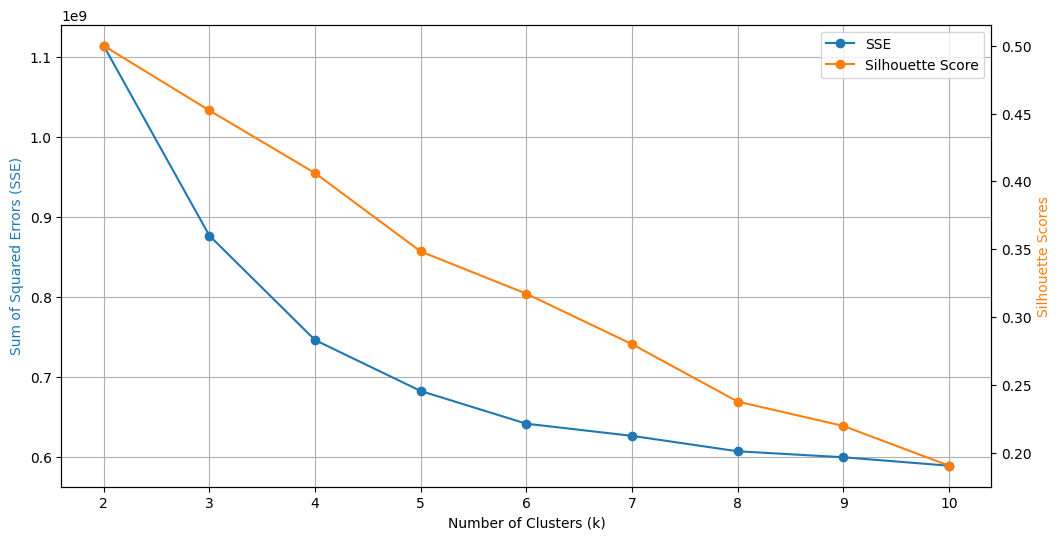

In [71]:
k_values = range(2, max_k + 1)
# Plot SSE and silhouette scores
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot SSE
ax1.plot(k_values, sse_dft_e, marker='o', color='tab:blue', label='SSE')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum of Squared Errors (SSE)', color='tab:blue')

# Create a second y-axis to plot silhouette scores
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores_dft_e, marker='o', color='tab:orange', label='Silhouette Score')
ax2.set_ylabel('Silhouette Scores', color='tab:orange')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

ax1.grid(True)
#plt.title('SSE and Silhouette Scores vs. Number of Clusters')
plt.show()


In [113]:
km= kme.KMedoids(n_clusters=4, max_iter=5, random_state=0, metric="precomputed", metric_params=None, method='pam', init='random')
km.fit(distance_matrix_dft_dtw)
labels_e_dft_dtw=km.labels_
c_counts_e= pd.Series(labels_e_dft_dtw).value_counts().sort_index()
c_counts_e


0    812
1    418
2    551
3    219
Name: count, dtype: int64

In [73]:
print('SSE KMeans Euclidean : ', km.inertia_)

labels_e = km.labels_
silhouette_e = kme.silhouette(distance_matrix_dft_dtw, labels_e)
print('Silhouette KMeans Euclidean : ', silhouette_e)

SSE KMeans Euclidean :  746404015.8440093
Silhouette KMeans Euclidean :  (0.40617126477547116, [])


### Kmedoid with DFT and Eucl

In [99]:
# Assuming distance_matrix_paa_dtw is the precomputed distance matrix
max_k = 10
sse_dft_e = []
silhouette_scores_dft_e = []

for k in range(2, max_k + 1):
    # Initialize KMedoids with precomputed distance matrix
    kmedoid = kme.KMedoids(n_clusters=k, max_iter=5, random_state=0, metric="precomputed", metric_params=None, method='pam', init='random')
    kmedoid.fit(distance_matrix_dft)
    sse_dft_e.append(kmedoid.inertia_) #kmeans.inertia gives the sse
    print(f'{k}th fit done')
    
    # Append silhouette coefficient
    labels_e = kmedoid.labels_
    silhouette = kme.silhouette(distance_matrix_dft, labels_e)
    silhouette_scores_dft_e.append(silhouette)
    print(f'{k}th append done')

# Results
print("Silhouette Scores:", silhouette_scores_dft_e)
print("SSE Scores:", sse_dft_e)
silhouette_scores_dft_e = [x[0] for x in silhouette_scores_dft_e]


2th fit done
2th append done
3th fit done
3th append done
4th fit done
4th append done
5th fit done
5th append done
6th fit done
6th append done
7th fit done
7th append done
8th fit done
8th append done
9th fit done
9th append done
10th fit done
10th append done
Silhouette Scores: [(0.4802176533515054, []), (0.4030865240231207, []), (0.32998584091423483, []), (0.27809526894056896, []), (0.235910771022604, []), (0.22377517176368888, []), (0.18422118210607671, []), (0.1624331481055639, []), (0.14946817939004242, [])]
SSE Scores: [1223427977.48481, 990298064.5044838, 857573023.7779773, 814699630.6987431, 776917926.0472032, 768672277.306066, 764038816.2783053, 756311957.4354309, 749487240.7809544]


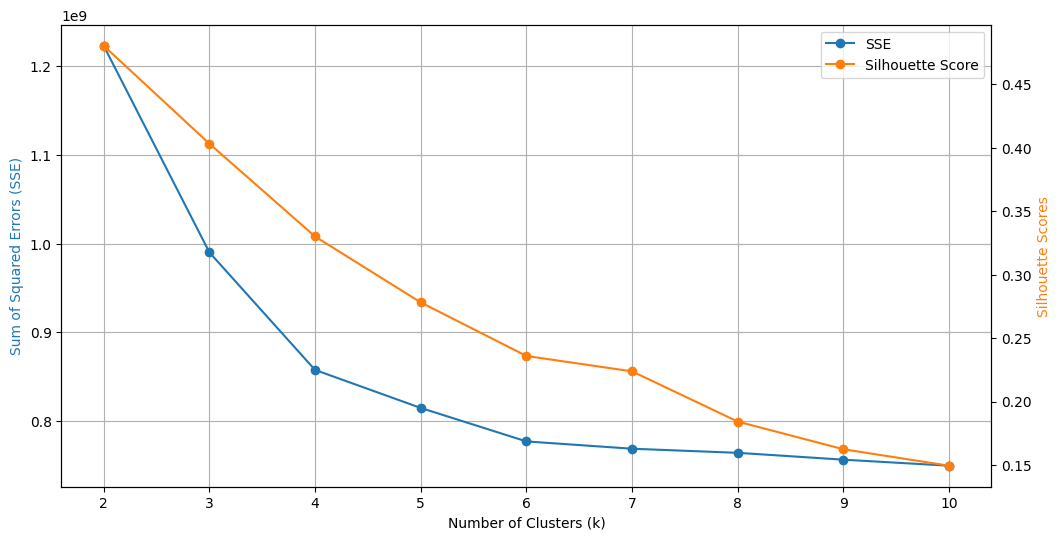

In [101]:
k_values = range(2, max_k + 1)
# Plot SSE and silhouette scores
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot SSE
ax1.plot(k_values, sse_dft_e, marker='o', color='tab:blue', label='SSE')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum of Squared Errors (SSE)', color='tab:blue')

# Create a second y-axis to plot silhouette scores
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores_dft_e, marker='o', color='tab:orange', label='Silhouette Score')
ax2.set_ylabel('Silhouette Scores', color='tab:orange')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

ax1.grid(True)
#plt.title('SSE and Silhouette Scores vs. Number of Clusters')
plt.show()


In [122]:
km= kme.KMedoids(n_clusters=4, max_iter=5, random_state=0, metric="precomputed", metric_params=None, method='pam', init='random')
km.fit(distance_matrix_dft)
labels_e_dft_eucl=km.labels_
c_counts_e= pd.Series(labels_e_dft_eucl).value_counts().sort_index()
c_counts_e


0    734
1    435
2    607
3    224
Name: count, dtype: int64

In [103]:
print('SSE KMeans Euclidean : ', km.inertia_)

labels_e = km.labels_
silhouette_e = kme.silhouette(distance_matrix_dft, labels_e)
print('Silhouette KMeans Euclidean : ', silhouette_e)

SSE KMeans Euclidean :  857573023.7779773
Silhouette KMeans Euclidean :  (0.32998584091423483, [])


# Clustering View

I want to view: PAA DTW, DFT EUCL, DFT DTW

In [133]:
X = X_dft
labels = labels_e_dft_dtw


In [124]:
unique_labels = list(set(labels))
unique_labels


[0, 1, 2, 3]

In [125]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
X_tsne.shape


(2000, 2)

/var/folders/kz/z9pm_78940q0wmly2vd_r41h0000gn/T/ipykernel_73971/1223438527.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10')  # Or any other colormap name you prefer


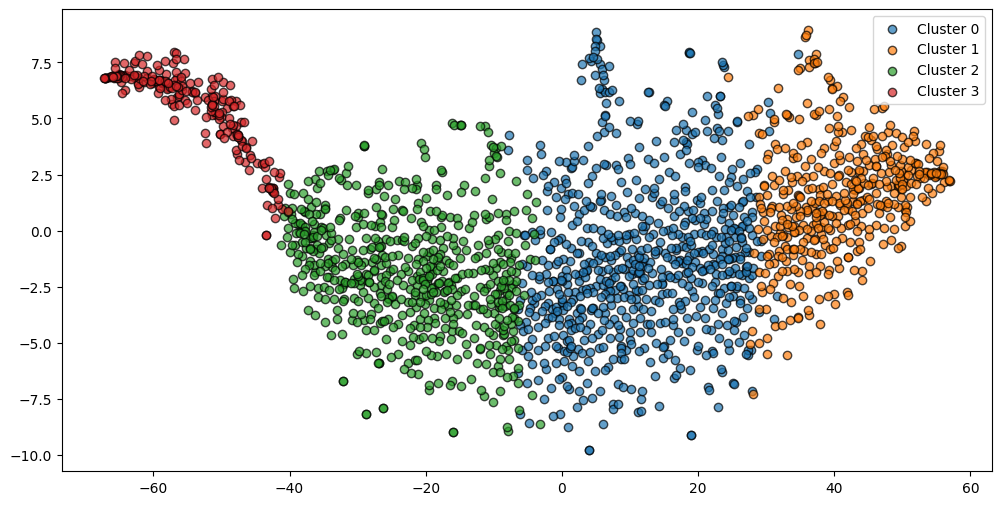

In [126]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.figure(figsize=(12,6))
cmap = plt.cm.get_cmap('tab10')  # Or any other colormap name you prefer

for cluster_label in set(labels):
    mask = (labels == cluster_label)
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], label=f'Cluster {cluster_label}', color=cmap(cluster_label), edgecolor='k', alpha=0.7)
plt.legend()
plt.show()


In [127]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_train_pca = pca.transform(X)
X_train_pca.shape


(2000, 2)

/var/folders/kz/z9pm_78940q0wmly2vd_r41h0000gn/T/ipykernel_73971/4002070470.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10')


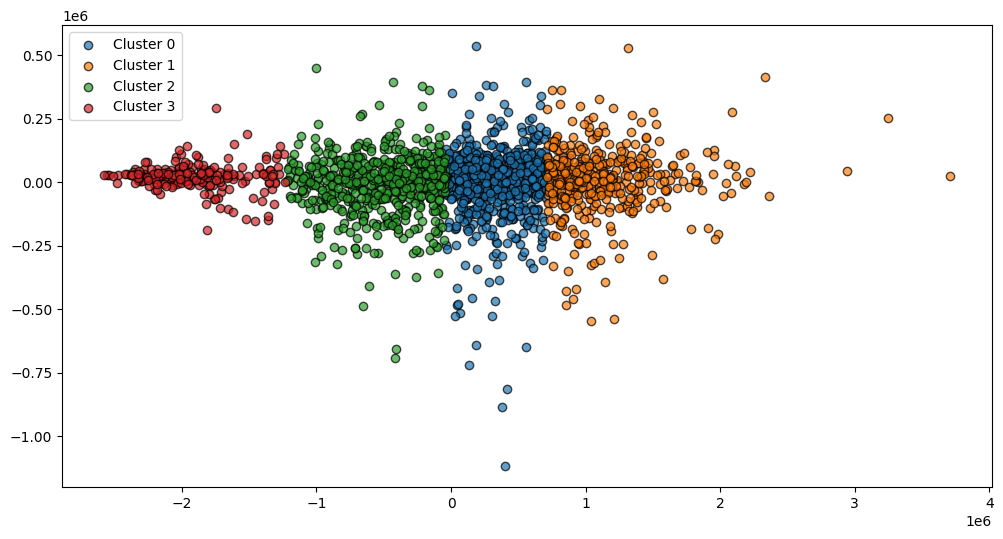

In [128]:
plt.figure(figsize=(12,6))
cmap = plt.cm.get_cmap('tab10')

for cluster_label in set(labels):
    mask = (labels == cluster_label)
    plt.scatter(X_train_pca[mask, 0], X_train_pca[mask, 1], label=f'Cluster {cluster_label}', color=cmap(cluster_label), edgecolor='k', alpha=0.7)
plt.legend()
plt.show()


In [129]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
X_train_iso = iso.fit_transform(X)
X_train_iso.shape


(2000, 2)

/var/folders/kz/z9pm_78940q0wmly2vd_r41h0000gn/T/ipykernel_73971/4154412808.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10')


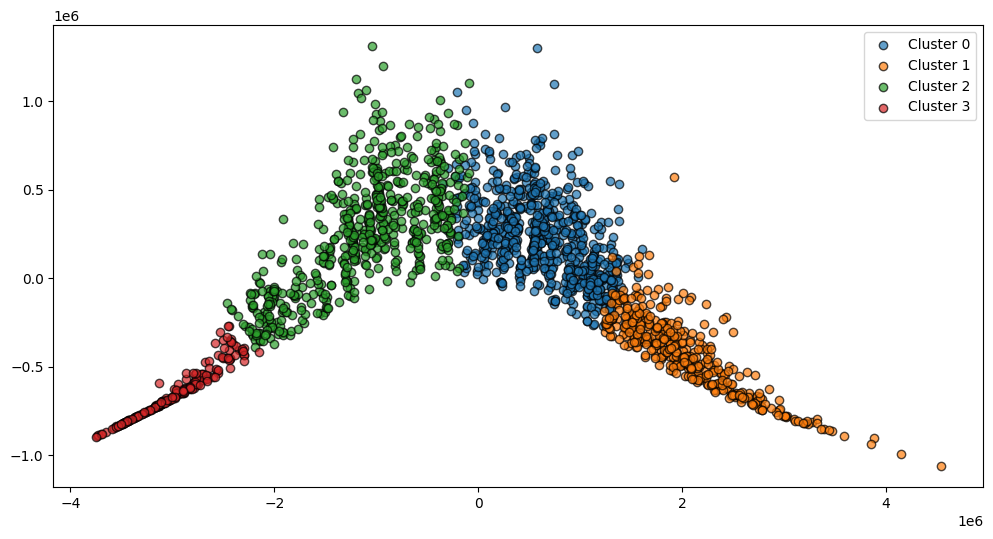

In [130]:
plt.figure(figsize=(12,6))
#cmap = plt.cm.get_cmap('Paired', len(set(labels)))
cmap = plt.cm.get_cmap('tab10')

for cluster_label in set(labels):
    mask = (labels == cluster_label)
    plt.scatter(X_train_iso[mask, 0], X_train_iso[mask, 1], label=f'Cluster {cluster_label}', color=cmap(cluster_label), edgecolor='k', alpha=0.7)
plt.legend()
plt.show()


In [131]:
# Assuming y is a Series or array
y = pd.DataFrame(y, columns=['genre'])  # Change 'Original_Column_Name' to the actual name of your original column

# Assuming labels is a list or array containing cluster labels
y['Cluster_Labels'] = labels
y


,genre,Cluster_Labels
0,emo,0
1,emo,0
2,emo,2
3,emo,0
4,emo,0
...,...,...
1995,world-music,3
1996,world-music,2
1997,world-music,0
1998,world-music,0


/var/folders/kz/z9pm_78940q0wmly2vd_r41h0000gn/T/ipykernel_73971/1186822132.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Paired', len(pivot_df.columns))


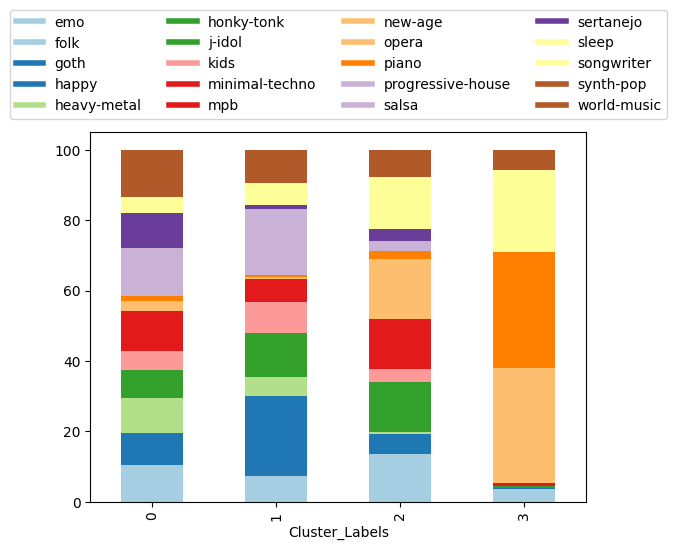

In [134]:
grouped_data = y.groupby(['Cluster_Labels', 'genre']).size()
cluster_totals = grouped_data.groupby('Cluster_Labels').sum()
percentages = grouped_data.div(cluster_totals, level='Cluster_Labels') * 100
pivot_df = percentages.reset_index().pivot(index='Cluster_Labels', columns='genre', values=0)

cmap = plt.cm.get_cmap('Paired', len(pivot_df.columns))
ax = pivot_df.plot(kind='bar', stacked=True, color=[cmap(i) for i in range(len(pivot_df.columns))])
legend_labels = [plt.Line2D([0], [0], color=cmap(i), lw=4, label=label) for i, label in enumerate(pivot_df.columns)]

ax.legend(handles=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.35), fancybox=True, shadow=False, ncol=4)


In [136]:
!pip install squarify

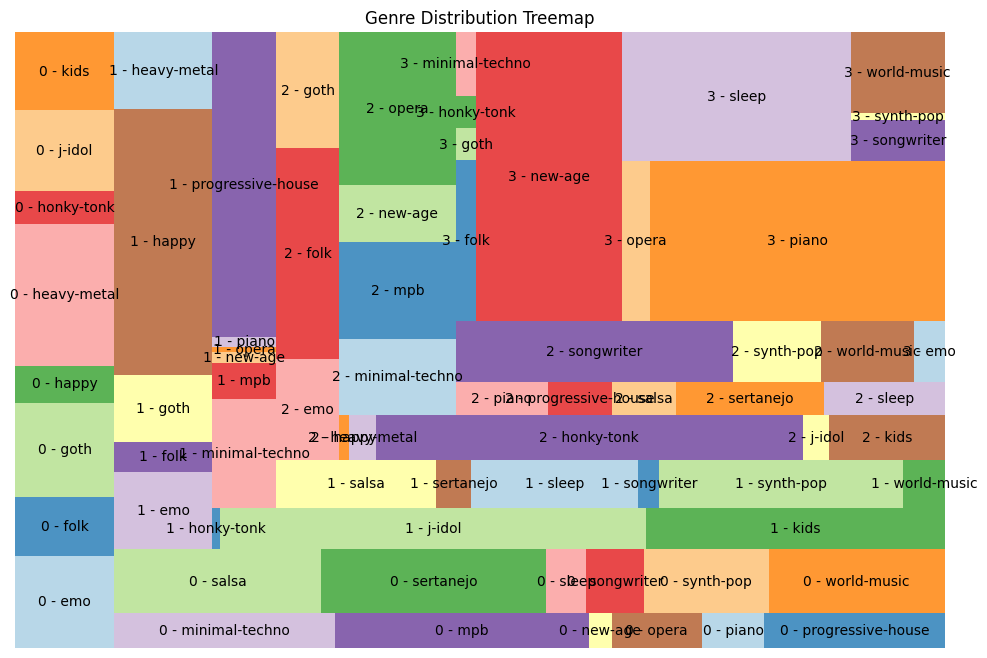

In [137]:
import squarify

# Flatten percentages for treemap
treemap_data = percentages.reset_index()
treemap_data['label'] = treemap_data['Cluster_Labels'].astype(str) + " - " + treemap_data['genre']

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=treemap_data[0],
    label=treemap_data['label'],
    alpha=0.8,
    color=plt.cm.Paired.colors
)
plt.axis('off')
plt.title("Genre Distribution Treemap")
plt.show()


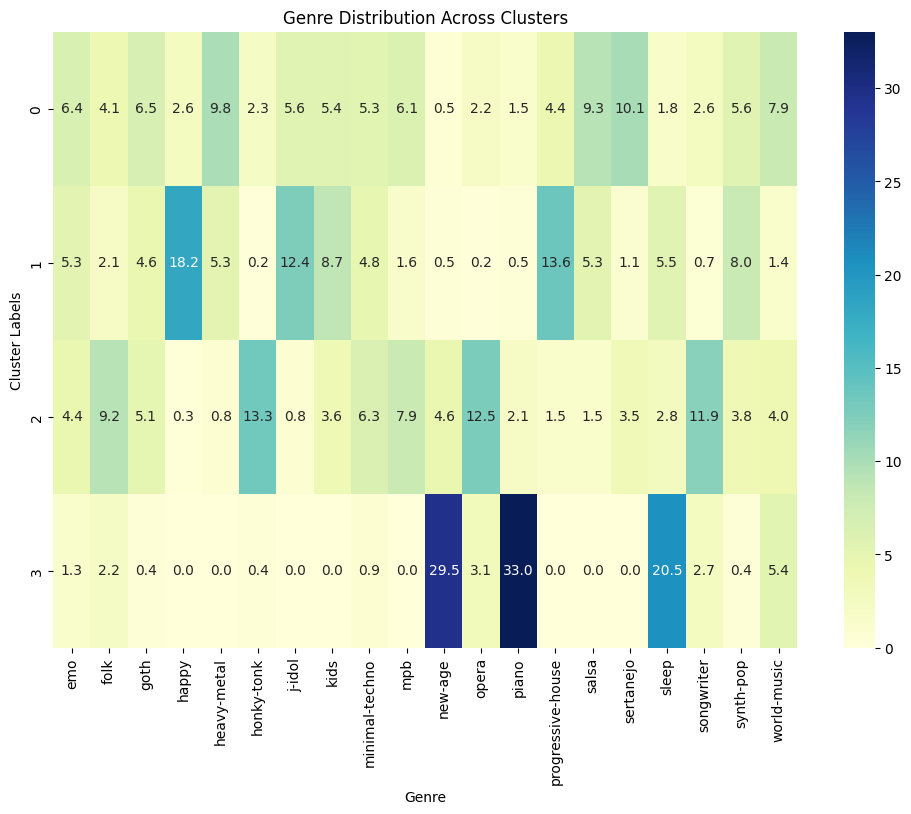

In [140]:
l